## 911 Calls Data

** to analyze some 911 call data from Kaggle

In [91]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('whitegrid')

In [92]:
#read csv file
df = pd.read_csv('911.csv')

In [93]:
#check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [94]:
#check data head
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [95]:
#top 5 zipcodes for 911 calls
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [96]:
#top 5 townships for 911 calls
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [97]:
#number of unique title codes in title
df['title'].nunique()

110

In [98]:
#create a new feature called Reason 
#and split the title types into different category
df['Reason'] =df['title'].apply(lambda title: title.split(':')[0])

In [99]:
#common reason for a 911 call
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

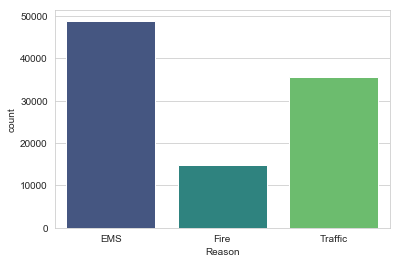

In [100]:
#use seaborn to create a countplot of reason
sns.countplot(df['Reason'], palette='viridis')

In [101]:
#data type of timeStamp
type(df['timeStamp'].iloc[0]) #check on the first row

str

In [102]:
#change timeStamp from string to DateTime 
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [103]:
#select the 51th row and assign its index to time  
time = df['timeStamp'].iloc[50]
time.hour

19

In [104]:
#create 3 new columns called Hour, Month, and Day of the Week*
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of the Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [105]:
#map the actual string names to the day of the week*
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['Day of the Week'] = df['Day of the Week'].map(dmap) 

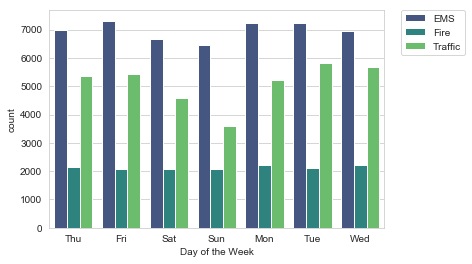

In [106]:
#create a countplot of day based on reason*
sns.countplot(x=df['Day of the Week'], data=df, hue='Reason', palette='viridis')

#relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

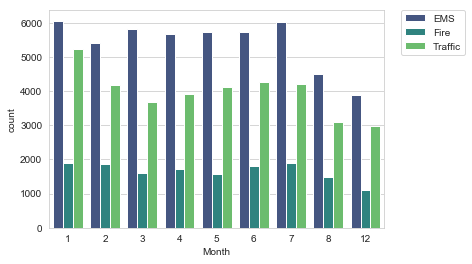

In [111]:
#do the same to month
sns.countplot(x=df['Month'], data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [113]:
#missing month?
df['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

In [124]:
#In the data there are missing months. 
#Create another plot to 'fill' in the information.
#Group the info by month and call it byMonth
byMonth = df.groupby('Month').count()
#groupby allows the index becomes the months.

In [125]:
byMonth.head()
#Without count(), it simply rearrange the month(or group the month).
#With count(), it aggregates the data/instances by month.

#Based on the head, the numbers should be the same like lat, lng, reason.
#Because it counts the number of instances by month. 
#Due to missing info, some columns like zip, addr, don't match the rest.

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of the Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


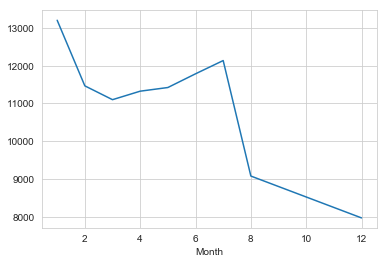

In [127]:
#create a plot of count of calls per month. 
#Any same columns can be used, like lat, lng, reason.
byMonth['Reason'].plot()

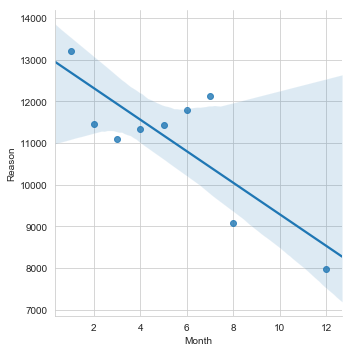

In [148]:
#use seaborn to create a linear fit on the number of calls per month
#set index to a column. Month is not in a column, it is an index.
#using reset_index(), it creates a column from index to allow season to assess
#this column.
sns.lmplot(x='Month', y='Reason', data=byMonth.reset_index())

#It can be seen that linear model isn't a good fit. 
#Bigger shaded area, more error.

In [145]:
#create a new column called 'Date'
df['Date'] = df['timeStamp'].apply(lambda time: time.date())

#a timeStamp object shows the time.
#date() is a a date object with and only shows date.

In [152]:
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of the Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


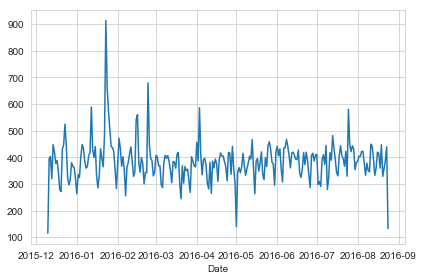

In [153]:
#group by date and make a count plot
df.groupby('Date').count()['Reason'].plot()
plt.tight_layout() #to remove overlapping

In [159]:
#create different plots to represent the reason for the calls by date
df[df['Reason']=='Traffic'] #conditional selection*

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of the Week,Date
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,17,12,Thu,2015-12-10
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,MONTGOMERY,RT202 PKWY & KNAPP RD,1,Traffic,17,12,Thu,2015-12-10
11,40.084161,-75.308386,BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...,19428.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,PLYMOUTH,BROOK RD & COLWELL LN,1,Traffic,17,12,Thu,2015-12-10
12,40.174131,-75.098491,BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND;...,19040.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,UPPER MORELAND,BYBERRY AVE & S WARMINSTER RD,1,Traffic,17,12,Thu,2015-12-10
13,40.062974,-75.135914,OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-1...,19027.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,CHELTENHAM,OLD YORK RD & VALLEY RD,1,Traffic,17,12,Thu,2015-12-10
14,40.097222,-75.376195,SCHUYLKILL EXPY & CROTON RD UNDERPASS; UPPER M...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,UPPER MERION,SCHUYLKILL EXPY & CROTON RD UNDERPASS,1,Traffic,17,12,Thu,2015-12-10
15,40.223778,-75.235399,STUMP RD & WITCHWOOD DR; MONTGOMERY; 2015-12-1...,18936.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,MONTGOMERY,STUMP RD & WITCHWOOD DR,1,Traffic,17,12,Thu,2015-12-10
19,40.209337,-75.135266,COUNTY LINE RD & WILLOW DR; HORSHAM; 2015-12-1...,18974.0,Traffic: DISABLED VEHICLE -,2015-12-10 17:47:02,HORSHAM,COUNTY LINE RD & WILLOW DR,1,Traffic,17,12,Thu,2015-12-10
20,40.114239,-75.338508,PENN ST & ARCH ST; NORRISTOWN; 2015-12-10 @ 17...,19401.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:47:02,NORRISTOWN,PENN ST & ARCH ST,1,Traffic,17,12,Thu,2015-12-10
21,40.117948,-75.209848,CHURCH RD & REDCOAT DR; WHITEMARSH; 2015-12-10...,19031.0,Traffic: DISABLED VEHICLE -,2015-12-10 17:57:02,WHITEMARSH,CHURCH RD & REDCOAT DR,1,Traffic,17,12,Thu,2015-12-10


In [163]:
df[df['Reason']=='Traffic'].groupby('Date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of the Week
Date,,,,,,,,,,,,,
2015-12-10,43,43,43,35,43,43,43,41,43,43,43,43,43
2015-12-11,141,141,141,108,141,141,141,137,141,141,141,141,141
2015-12-12,146,146,146,109,146,146,146,144,146,146,146,146,146
2015-12-13,78,78,78,54,78,78,78,76,78,78,78,78,78
2015-12-14,186,186,186,150,186,186,186,184,186,186,186,186,186
2015-12-15,183,183,183,160,183,183,183,181,183,183,183,183,183
2015-12-16,132,132,132,111,132,132,132,131,132,132,132,132,132
2015-12-17,167,167,167,140,167,167,167,166,167,167,167,167,167
2015-12-18,148,148,148,123,148,148,148,148,148,148,148,148,148


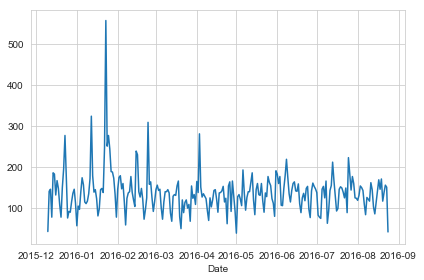

In [166]:
#first plot - Traffic
df[df['Reason']=='Traffic'].groupby('Date').count()['Reason'].plot()
plt.tight_layout()

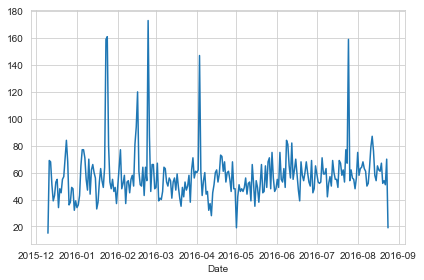

In [167]:
#second plot - Fire
df[df['Reason']=='Fire'].groupby('Date').count()['Reason'].plot()
plt.tight_layout()

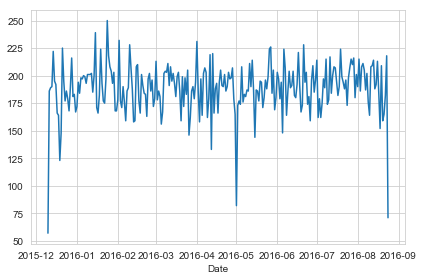

In [168]:
#third plot - EMS
df[df['Reason']=='EMS'].groupby('Date').count()['Reason'].plot()
plt.tight_layout()

In [169]:
##HOW TO USE LOOP TO DO THIS?

In [174]:
#create dateframe so that the columns become the hours and the index becomes 
#the day of the week. In matrix form.
df.groupby(by=['Day of the Week', 'Hour']).count() #groupby a list

lat   lng  desc  zip  title  timeStamp   twp  addr  \
Day of the Week Hour                                                        
Fri             0      275   275   275  248    275        275   275   275   
                1      235   235   235  200    235        235   235   232   
                2      191   191   191  165    191        191   191   191   
                3      175   175   175  164    175        175   175   175   
                4      201   201   201  184    201        201   201   201   
                5      194   194   194  166    194        194   194   194   
                6      372   372   372  319    372        372   372   369   
                7      598   598   598  526    598        598   598   593   
                8      742   742   742  637    742        742   742   737   
                9      752   752   752  663    752        752   752   748   
                10     803   803   803  722    803        803   803   800   
                11     859   859   859  756    859        859   859   858   
                12     885   885   885  764    885        885   885   877   
                13     890   890   890  767    890        890   890   885   
                14     932   932   932  808    932        932   931   926   
                15     980   980   980  840    980        980   980   976   
                16    1039  1039  1039  897   1039       1039  1039  1038   
                17     980   980   980  826    980        980   980   971   
                18     820   820   820  714    820        820   819   818   
                19     696   696   696  616    696        696   696   693   
                20     667   667   667  569    667        667   667   666   
                21     559   559   559  491    559        559   558   553   
                22     514   514   514  445    514        514   514   513   
                23     474   474   474  400    474        474   474   469   
Mon             0      282   282   282  243    282        282   282   282   
                1      221   221   221  198    221        221   220   221   
                2      201   201   201  183    201        201   201   201   
                3      194   194   194  173    194        194   194   194   
                4      204   204   204  185    204        204   204   203   
                5      267   267   267  222    267        267   267   267   
...                    ...   ...   ...  ...    ...        ...   ...   ...   
Tue             18     905   905   905  761    905        905   905   900   
                19     731   731   731  666    731        731   731   722   
                20     647   647   647  579    647        647   647   646   
                21     571   571   571  494    571        571   570   565   
                22     462   462   462  411    462        462   462   460   
                23     274   274   274  245    274        274   274   273   
Wed             0      250   250   250  226    250        250   249   249   
                1      216   216   216  193    216        216   216   216   
                2      189   189   189  169    189        189   189   188   
                3      209   209   209  195    209        209   207   209   
                4      156   156   156  138    156        156   156   155   
                5      255   255   255  224    255        255   254   254   
                6      410   410   410  334    410        410   409   409   
                7      701   701   701  591    701        701   701   692   
                8      875   875   875  770    875        875   875   872   
                9      808   808   808  714    808        808   808   805   
                10     800   800   800  713    800        800   800   799   
                11     789   789   789  698    789        789   789   784   
                12     903   903   903  812    903        903   902   901   
                13 

In [216]:
df1 = df.groupby(by=['Day of the Week', 'Hour']).count()['Reason'].unstack()
#unstack makes it into matrix based on reason count.
#the steps are: grouping by multiple columns, and use unstack to unstack them
#into column and row.

In [217]:
df1

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of the Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


In [218]:
#pivot table can also be used
df2 = pd.pivot_table(df, values='e', index='Day of the Week', columns='Hour', aggfunc=sum)
#value 'e' is used because it's the count from df dataset. 
#It can be summed using aggfunc.
#If reason is used, the matrix shows the reason itself rather than numerical value.

In [219]:
df2

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of the Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


In [220]:
df1==df2

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of the Week,,,,,,,,,,,,,,,,,,,,,
Fri,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Mon,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Sat,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Sun,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Thu,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Tue,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Wed,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


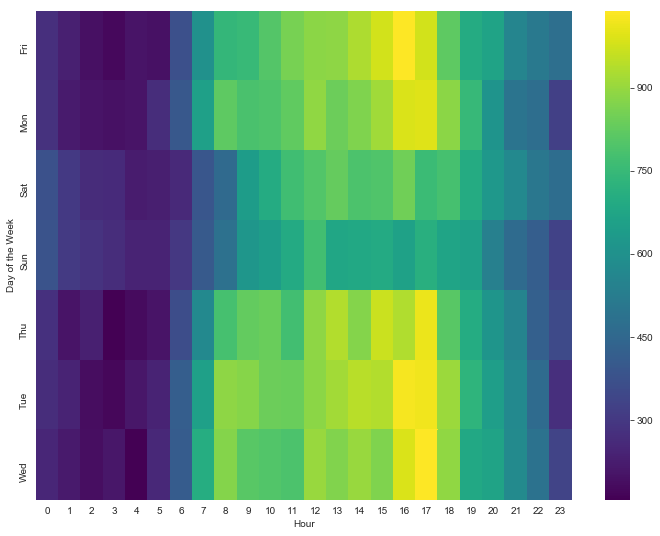

In [221]:
#plot heatmap
plt.figure(figsize=(12,9)) #this has to come first, otherwise the size won't change
sns.heatmap(df1, cmap='viridis')

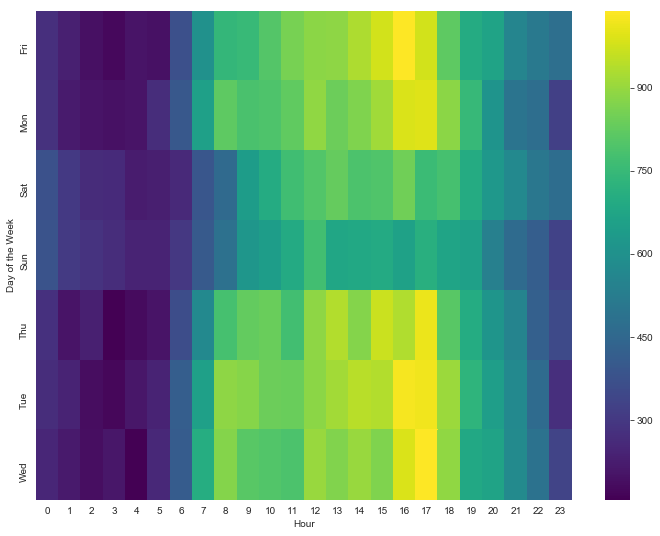

In [222]:
plt.figure(figsize=(12,9))
sns.heatmap(df2, cmap='viridis')

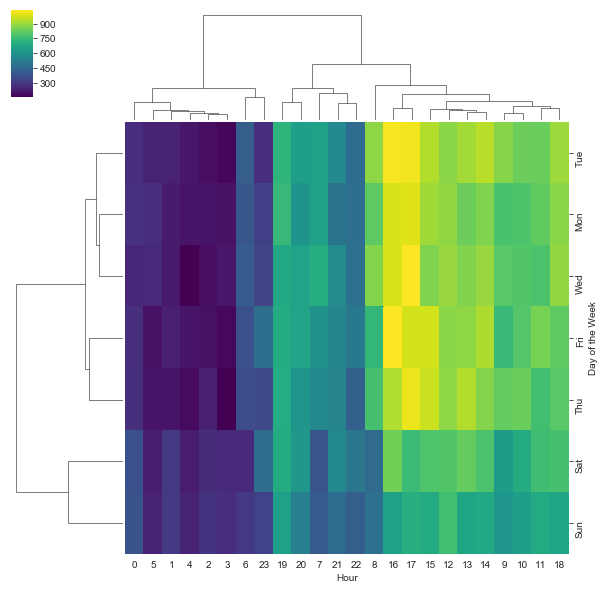

In [223]:
#create cluster plot
sns.clustermap(df1, cmap='viridis')

In [224]:
#repeat using month
df3 = df.groupby(by=['Day of the Week', 'Month']).count()['Reason'].unstack()

In [225]:
df3

Month,1,2,3,4,5,6,7,8,12
Day of the Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


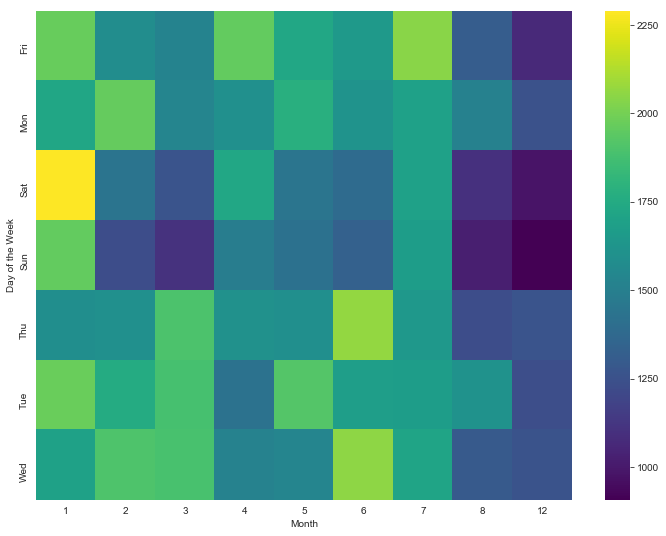

In [229]:
plt.figure(figsize=(12,9))
sns.heatmap(df3, cmap='viridis')

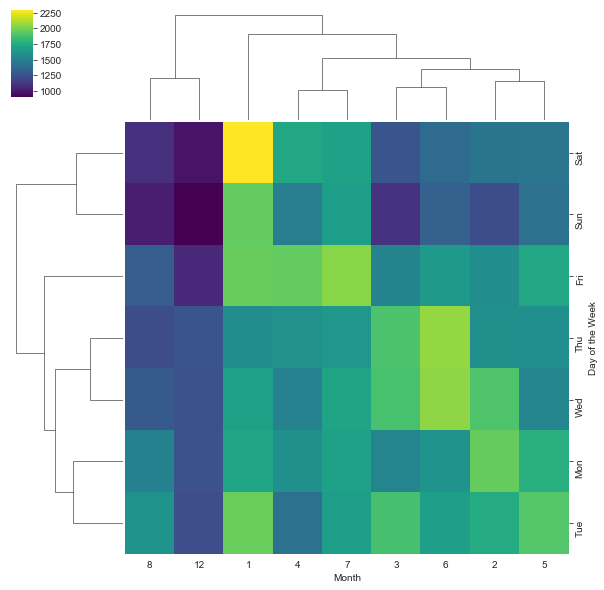

In [232]:
sns.clustermap(df3, cmap='viridis')